<a href="https://colab.research.google.com/github/thap/ml-sklearn-tensorflow/blob/master/01_Import_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/data/handon-ml/')
print(os.getcwd())
!ls

/content/drive/My Drive/data/handon-ml
datasets


In [0]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
np.random.seed(18101988)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'fundamentals'

def save_fig(fig_id, tight_layout=True):
  path = os.path_join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format='png', dpi=300)

import warnings
warnings.filterwarnings(action='ignore', message='internal gelsd')

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
  oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
  oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
  gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
  gdp_per_capita.set_index('Country', inplace=True)
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
  full_country_stats.sort_values(by='GDP per capita', inplace=True)
  remove_indices = [0, 1, 6, 8, 33, 34, 35]
  keep_indices = list(set(range(36)) - set(remove_indices))
  return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]


In [0]:
import os
datapath = os.path.join('datasets', 'lifesat', '')

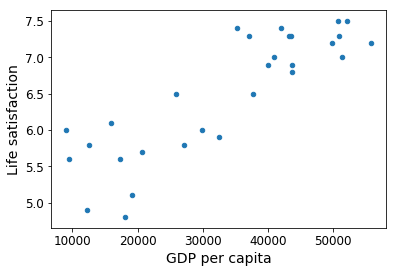

[[5.96242338]]


In [12]:
import pandas as pd
import sklearn.linear_model

oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t',
                             encoding='latin1', na_values='n/a')

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
X_new = [[22587]]
print(model.predict(X_new))